# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models. 

3. Why is the Gini a good loss function for categorical target variables? 

4. Why do trees tend to overfit, and how can this tendency be constrained? 

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees are constructed by finding some variables to split the data on such that the resulting groups are as pure as possible (i.e., the outcomes of group members are as different as possible from the outcomes of other groups' members). From here, we just find more splits for the resultant groups, then split those groups, and so on.
2. Trees are better with non-linear data because they just split data based on thresholds without assuming the shape of the data. In contrast, linear models work best with linear data. Additionally, with trees we don't need to worry about distances between values, which are relevant in linear models.
3. The Gini is a good loss function because it's a smooth, continuous distribution over $[0, 1]$ with a peak at 0.5 and zeroes at 0 and 1. This works since we consider having a proportion of 0 or 1 to be perfectly impure, while a proportion of 0.5 is as impure as possible.
4. Trees tend to overfit since they can keep finding groups that are close to pure within partitions of the data. This can be constrained by limiting the depth of the tree or increasing the impurity required to split a tree further.
5. False -- trees do perform well in these situations, but they work fine with continuous numerical data, setting thresholds on numeric features as splits.
6. Binary trees are simpler to work with at each level, and a multi-way split can be expressed by having multiple successive binary splits.
7. Overfitting is characterized by lots of levels in the tree, small leaf samples, and performance that's much better on training data than test data. Underfitting often has the opposite -- very few levels, massive leaf samples, and not many features used.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see. 

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

(2509, 34)
  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0                 claudin-low     1.0        

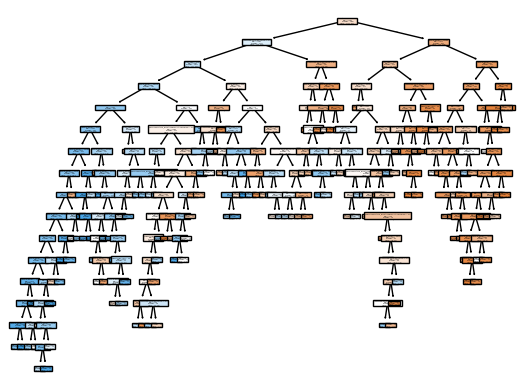

Predicted  Deceased  Living
Actual                     
Deceased        947     197
Living          282     555
Best min_samples_leaf: 107 -- R^2: 0.0516087154749314


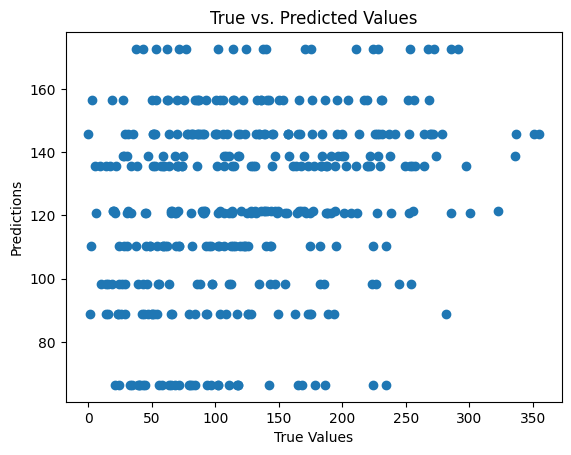

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree

df = pd.read_csv("data/Breast Cancer METABRIC.csv")
print(df.shape)  # 2509 rows, 34 columns
print(df.head())

X_numeric = df[["Tumor Size", "Lymph nodes examined positive", "Age at Diagnosis"]]
X_categorical = df[["Tumor Stage", "Chemotherapy", "Cancer Type Detailed"]]
X_categorical_encoded = pd.get_dummies(X_categorical, drop_first=True)
X = pd.concat([X_numeric, X_categorical_encoded, df["Overall Survival Status"]], axis=1)
X.dropna(subset=["Overall Survival Status"], inplace=True)
X.drop(columns=["Overall Survival Status"], inplace=True)

y = df["Overall Survival Status"]
y = y.dropna()
cart = DecisionTreeClassifier(min_samples_leaf=10)
cart = cart.fit(X, y)
var_names = cart.feature_names_in_
plot_tree(cart,filled=True,feature_names=var_names)
plt.show()
y_hat = cart.predict(X)
print(pd.crosstab(y, y_hat, rownames=["Actual"], colnames=["Predicted"]))

# Accuracy: (555 + 947) / (555 + 282 + 197 + 947) = 0.758
# TPR: 555 / (555 + 282) = 0.663
# TNR: 947 / (947 + 197) = 0.829
# The model seems to have a higher TNR. It's better at identifying when someone will not survive.

X = pd.concat([X_numeric, X_categorical_encoded, df["Overall Survival (Months)"]], axis=1)
X.dropna(subset=["Overall Survival (Months)"], inplace=True)
X.drop(columns=["Overall Survival (Months)"], inplace=True)
y = df["Overall Survival (Months)"]
y = y.dropna()
best_num = -1
best_r2 = float("-inf")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
for i in range(100, 121):
    cart = DecisionTreeRegressor(min_samples_leaf=i)
    cart = cart.fit(X_train, y_train)
    r2 = cart.score(X_test, y_test)
    if r2 > best_r2:
        best_r2 = r2
        best_num = i
print(f"Best min_samples_leaf: {best_num} -- R^2: {best_r2}")
cart = DecisionTreeRegressor(min_samples_leaf=best_num)
cart = cart.fit(X_train, y_train)
y_hat = cart.predict(X_test)
plt.scatter(y_test, y_hat)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs. Predicted Values")
plt.show()
# The R^2 is only about 0.05 so I wouldn't trust this model much in a clinical setting.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. 

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?


A least-squares linear regression has the formula $\hat{y}(x) = \sum^{K}_{k=1} \beta_{k} \phi_{k}(x)$, where $\beta_{k}$ is a weight and $\phi_{k}(x)$ is a function of $x$. If we set $\beta_{k} = m_k$ and $\phi_{k}(x) = \mathbb{I}\{x \text{ is in } S_k\}$, then we can see that the CART formula $\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k$ is a special case of the least-squares linear regression formula.

Not every linear regression can be represented by a tree. The domain of the variable $x$ is continuous in a linear regression, whereas with a tree it's a set of discrete values. Therefore, an attempt to replicate a linear regression with a tree will result in a graph that looks like a step function.